In [1]:
# 1. Importing the libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# 2. Importing the Dataset

In [4]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test)=cifar10.load_data()

In [5]:
# 3. Preprocessing

In [6]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Train_datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Test_datagen=ImageDataGenerator(rescale=1/255)

In [7]:
Train_Set=Train_datagen.flow(X_train, Y_train, batch_size=32)
Test_Set=Test_datagen.flow(X_test, Y_test, batch_size=32)

In [8]:
# 4. Building the CNN

In [9]:
cnn=tf.keras.models.Sequential()

In [10]:
## 4.1 Convolution Layer - 1

In [11]:
from keras.layers import BatchNormalization, Dropout

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.2))

In [13]:
## 4.2 Convolution Layer - 2

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.3))

In [15]:
## 4.3 Convolution Layer - 3

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(Dropout(0.4))

In [17]:
## 4.4 Flattening

In [18]:
cnn.add(tf.keras.layers.Flatten())

In [19]:
## 4.5 Full Connection

In [20]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

In [21]:
## 4.6 Output Layer

In [22]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [23]:
# 5. History Data

In [32]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [25]:
# 6. compiling and Fitting

In [26]:
from keras.optimizers import SGD
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=cnn.fit(Train_Set, validation_data=(Test_Set), epochs=80)

Epoch 1/80
1563/1563 [==============================] - 190s 121ms/step - loss: 2.1434 - accuracy: 0.3063 - val_loss: 1.8404 - val_accuracy: 0.3534
Epoch 2/80
1563/1563 [==============================] - 190s 122ms/step - loss: 1.4492 - accuracy: 0.4782 - val_loss: 1.3257 - val_accuracy: 0.5360
Epoch 3/80
1563/1563 [==============================] - 188s 120ms/step - loss: 1.3070 - accuracy: 0.5384 - val_loss: 1.2291 - val_accuracy: 0.5838
Epoch 4/80
1563/1563 [==============================] - 180s 115ms/step - loss: 1.2271 - accuracy: 0.5663 - val_loss: 1.1410 - val_accuracy: 0.5971
Epoch 5/80
1563/1563 [==============================] - 178s 114ms/step - loss: 1.1631 - accuracy: 0.5920 - val_loss: 0.9101 - val_accuracy: 0.6798
Epoch 6/80
1563/1563 [==============================] - 194s 124ms/step - loss: 1.1006 - accuracy: 0.6189 - val_loss: 0.8330 - val_accuracy: 0.7119
Epoch 7/80
1563/1563 [==============================] - 192s 123ms/step - loss: 1.0730 - accuracy: 0.6286 - val_

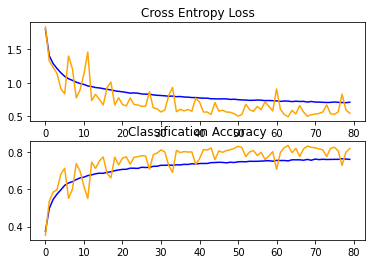

In [33]:
summarize_diagnostics(history)

In [27]:
# 7. predictions

In [28]:
from keras.preprocessing import image
img=X_test[2]
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
result=cnn.predict(img)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
#print(result)
print(pred)

8


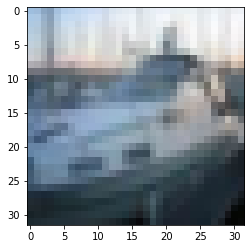

In [29]:
plt.imshow(X_test[2])
plt.show()

In [34]:
print(Y_test[2])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
